Programming Exercies2: Logistic Regression

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1 Logistic regression

In [20]:
datafile = 'ex2data1.txt'
# read file data
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)

# form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))
m = Y.size

X = np.insert(X, 0, 1, axis=1)


In [21]:
# test
test_datafile = 'ex2data1_cp.txt'
# read file data
cols_test = np.loadtxt(test_datafile, delimiter=',', usecols=(0,1,2), unpack=True)
print (cols_test)

# form the usual "X" matrix and "y" vector
print ("cols[:-1]:", cols_test[:-1], "cols[-1:]:",cols_test[-1:])

X_test = np.transpose(np.array(cols_test[:-1]))
Y_test = np.transpose(np.array(cols_test[-1:]))
m_test = Y_test.size
print ("x", X_test, "y:", Y_test)

X_test = np.insert(X_test, 0, 1, axis=1)


[[32. 74. 75. 35.]
 [95. 82. 85. 47.]
 [ 0.  1.  1.  0.]]
cols[:-1]: [[32. 74. 75. 35.]
 [95. 82. 85. 47.]] cols[-1:]: [[0. 1. 1. 0.]]
x [[32. 95.]
 [74. 82.]
 [75. 85.]
 [35. 47.]] y: [[0.]
 [1.]
 [1.]
 [0.]]


1.1 Visualing the data

In [22]:
# divide the sample into two: logistic function => y =1 or =0
# 1、ones with positive classification
# 2、ones with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

# check to make sure I included all entries
# print "Included everything? ",(len(pos)+len(neg) == X.shape[0])



In [24]:
# test
pos_t = np.array([X_test[i] for i in range(X_test.shape[0]) if Y_test[i] == 1])
neg_t = np.array([X_test[i] for i in range(X_test.shape[0]) if Y_test[i] == 0])

print ("pos:", pos_t)
print ("neg:", neg_t)
print ("pos[:,2]", pos_t[:,1])


pos: [[ 1. 74. 82.]
 [ 1. 75. 85.]]
neg: [[ 1. 32. 95.]
 [ 1. 35. 47.]]
pos[:,2] [74. 75.]


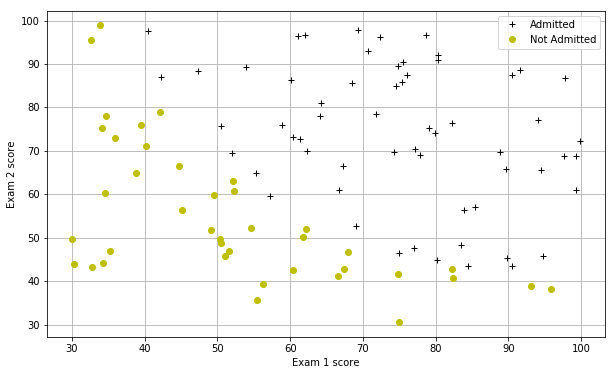

In [25]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1], pos[:,2], 'k+', label="Admitted")
    plt.plot(neg[:,1], neg[:,2], 'yo', label="Not Admitted")
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.grid(True)
    plt.legend()
    
plotData()    
    

1.2 Implementation

In [27]:
# vectorized sigmoid function
from scipy.special import expit

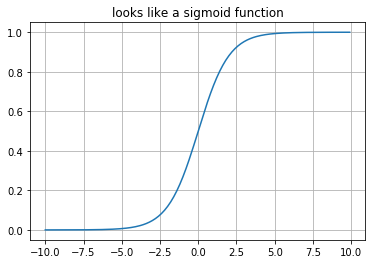

In [28]:
# 检查一下sigmoid函数 => expit(x)
myx = np.arange(-10, 10, .1)
plt.plot(myx, expit(myx))
plt.title("looks like a sigmoid function")
plt.grid(True)


In [29]:
# hypothesis function and cost function for logistic regression

# logistic hypothesis function
def h(mytheta, myX): 
    return expit(np.dot(myX, mytheta))

# cost function
def computeCost(mytheta, myX, myY, myLambda = 0.):
    """
    mytheta is an n-dimensional vector of initial theta guess
    myX is a matrix with n-columns and m-rows
    myY is a matrix with m-rows and 1 column
    
    Note: this includes regularization, if you set myLambda to non-zero
    for the first part of the homework, the default 0. is used for myLambda
    """
    
    term1 = np.dot(-np.array(myY).T, np.log(h(mytheta, myX)))
    term2 = np.dot(1-np.array(myY).T, np.log(1-h(mytheta, myX)))
    
    # 正则化 => lambda * sum(øj)^2
    regterm = (myLambda/2) * np.sum(np.dot(mytheta[1:].T, mytheta[1:])) # skip ø0
    
    return float((1./m) * (np.sum(term1- term2) + regterm))



In [30]:
# check that with theta as zeros, cost returns about 0.693
initial_theta = np.zeros((X.shape[1], 1))
computeCost(initial_theta, X, Y)

0.6931471805599453

In [31]:
""""""
#An alternative to OCTAVE's 'fminunc' we'll use some scipy.optimize function, "fmin"
#Note "fmin" does not need to be told explicitly the derivative terms
#It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]



In [34]:
theta, mincost = optimizeTheta(initial_theta,X,Y)

print (mincost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
0.2034977015902151


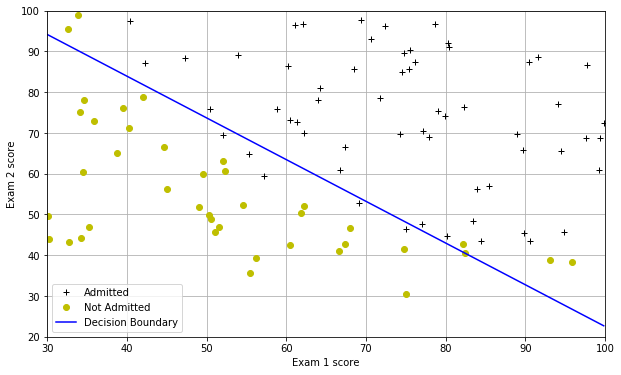

In [38]:
# plotting the decision boundary: two points, draw a line between
# decision boundary occurs when h=0, or when
# ø0 + ø1*x1 + ø2*x2 = 0
# y = mx + b is replaced by x2 = (-1/ø2)(ø0 + ø1*x1)

# 取出x1轴上，最大和最小的值
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
# 取出x2轴上，x1轴上最大和最小的值对应的值 《= x2 = (-1/ø2)(ø0 + ø1*x1)
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)

plotData()
plt.plot(boundary_xs, boundary_ys, 'b-', label='Decision Boundary')
plt.xlim(30, 100)
plt.ylim(20, 100)
plt.legend()



In [40]:
# for a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
# you should expect to see an admission probability of 0.776.
print (h(theta,np.array([1, 45.,85.])))


0.7762915904112411


In [43]:
def makePrediction(mytheta, myX):
    return h(mytheta, myX) >= 0.5

# compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta, pos)))
neg_correct = float(np.sum(np.invert(makePrediction(theta, neg))))
tot = len(pos) + len(neg)
prcnt_correct = float(pos_correct + neg_correct) / tot
print ("Fraction of training samples correctly predicted: %f." % prcnt_correct )


Fraction of training samples correctly predicted: 0.890000.


2 Regularized Logistic Regression

In [44]:
datafile = 'ex2data2.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1,2), unpack=True)

X = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))

m = Y.size

X = np.insert(X, 0, 1, axis=1)

In [48]:
# divide the sample into two:
# ones with positive classification
# ones with negative classification
pos = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])

# print (pos)
# print (neg)


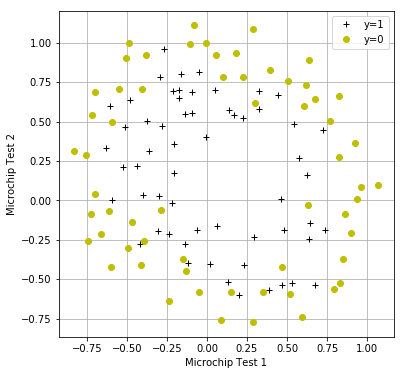

In [49]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

#Draw it square to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

2.2 Feature mapping

In [52]:
def mapFeature(x1col, x2col):
    """
    Function that takes in a column of n-x1's, a column of n-x2's, and builds
    a n-x 28-dim matrix of features as described in the homework assigment
    """
    
    degrees = 6
    out = np.ones((x1col.shape[0], 1))
    
    """
    为了获得这样的形式转换
    mapFeature(x) = [   1
                        x1
                        x2
                        x1^2
                        x1*x2
                        x2^2
                        x1^3
                        .
                        .
                        .
                        x1*x2^5
                        x2^6
                    ]
    A logistic regression classifier trained on this higher-dimension feature vector 
    will have a more complex decision boundary and will appear nonlinear 
    when drawn in our 2-dimensional plot                
    """
    for i in range(1, degrees+1): # 1 - x^6
        for j in range(0, i+1):
            term1 = x1col ** (i-j) # ** =》 乘方
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape(term1.shape[0], 1) 
            out   = np.hstack((out, term)
    return out

In [55]:
# create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

# print (mappedX)

2.3 Cost Function and Gradient

In [56]:
# cost function is the same as the one implemented above, as I included the regularization
# toggled off for default function call (lambda = 0)
# I do not need seperate implementation of the derivative term of the cost fucntion
# because the scripy optimization function i'm using only needs the cost function itself
# let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
# and regularizaed x values

initial_theta = np.zeros((mappedX.shape[1], 1))
computeCost(initial_theta, mappedX, Y)


0.6931471805599454

2.3.1 Learning parameters using fmin/minimize

In [58]:
# I noticed that fmin wasn't converging (passing max # of iterations)
# so let's use minimize instead
def optimizeRegularizedTheta(mytheta, myX, myY, myLambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myY, myLambda), method='BFGS', options={"maxiter":500, "disp":False})
    return np.array([result.x]), result.fun
                              
theta, mincost = optimizeRegularizedTheta(initial_theta, mappedX, Y)

print (theta, mincost)

[[   19.52269435    31.84021967    15.93788001  -190.59852033
    -83.6310338    -98.81513102  -233.83620851  -193.6262234
   -126.49477953   -39.68194579   654.79419846   498.84620123
    809.25583976   333.21416156   179.28156264   398.43147555
    516.98904945   614.16108487   356.15731339   128.46448539
     34.75456847  -766.47577043  -893.15487474 -1496.38858574
  -1031.0223571  -1009.97014316  -377.80312391  -121.72362368]] 0.24863999275541845


2.4 plotting the decision boundary

In [66]:
def plotBoundary(mytheta, myX, myY, myLambda=0.):
    """
    function to plot the decision boundary for arbitrary任意的 theta, x, y lambda value
    inside of this function is feature mapping, and the minimization routine
    it works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    and for each, computing whether the hypothesis classifies that point as 
    True or False. Then, a contour is dramn with a built-in pyplot function.
    """
    
    # 计算出全局最优ø，以及对应的最小cost
    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myY, myLambda)
    xvals = np.linspace(-1, 1.5, 50)
    yvals = np.linspace(-1, 1.5, 50)
    zvals = np.zeros((len(xvals), len(yvals)))
    
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]), np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta, myfeaturesij.T)
    zvals = np.transpose(zvals)
    print (zvals)
    
    u, v = np.meshgrid(xvals, yvals)
    mycontour = plt.contour(xvals, yvals, zvals)
    # kind of hacky出租车司机 way to display a text on top of the decision boundary
    myfmt = {0:'Lambda = %d' % myLambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")
    
    

[[ -8.8837372   -8.05895468  -7.34561806 ... -20.33212403 -23.62579823
  -27.43238505]
 [ -8.23160613  -7.41721025  -6.71353064 ... -19.61097858 -22.8831654
  -26.66639985]
 [ -7.66595623  -6.86088617  -6.16588189 ... -18.98948838 -22.24241543
  -26.0046785 ]
 ...
 [-19.15643209 -18.11582846 -17.22768514 ... -48.76636905 -53.24735487
  -58.30168124]
 [-22.12442994 -21.06158681 -20.15470964 ... -53.47979044 -58.07395222
  -63.24681422]
 [-25.55561697 -24.46971595 -23.54349228 ... -58.81033212 -63.52558959
  -68.82516516]]


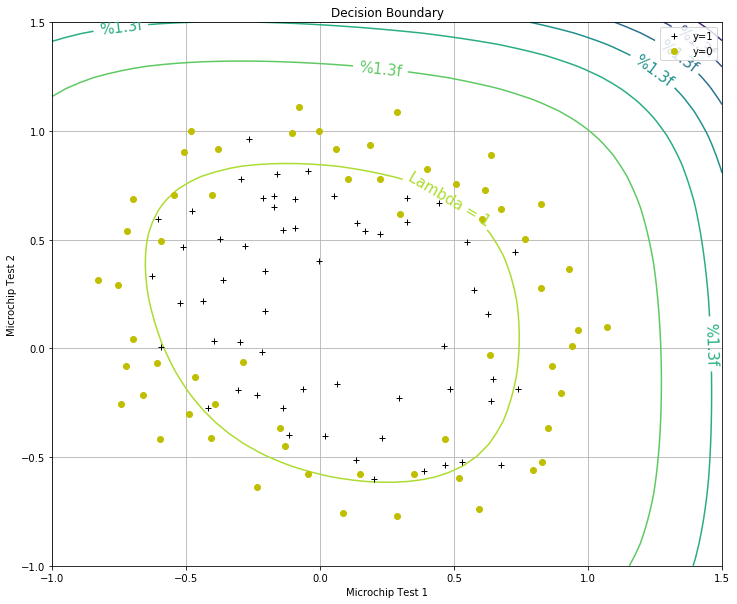

In [67]:
# test
plt.figure(figsize=(12,10))

plotData()
plotBoundary(theta, mappedX, Y, 1.)

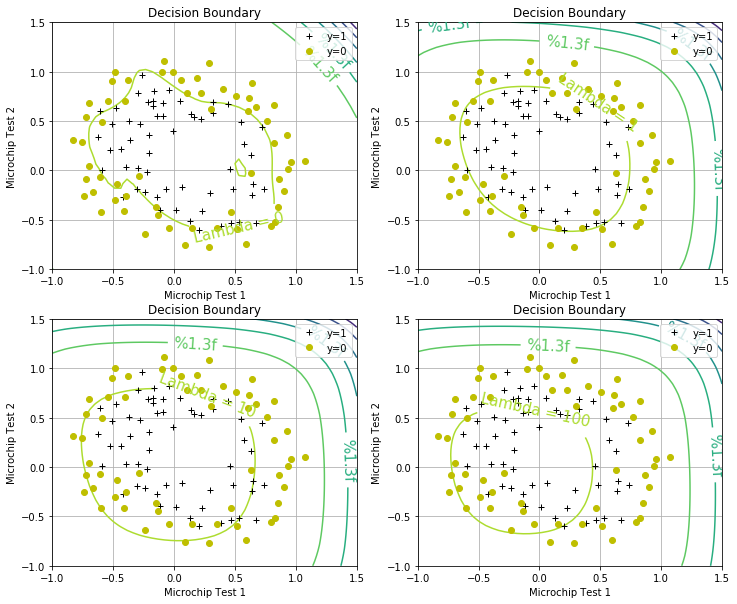

In [64]:
# build a figure showing contours外形 for various values of regularization parameter, lambda
# it shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting

plt.figure(figsize=(12,10))

plt.subplot(221)
plotData()
plotBoundary(theta, mappedX, Y, 0.)

plt.subplot(222)
plotData()
plotBoundary(theta, mappedX, Y, 1.)

plt.subplot(223)
plotData()
plotBoundary(theta, mappedX, Y, 10.)

plt.subplot(224)
plotData()
plotBoundary(theta, mappedX, Y, 100.)
